In [ ]:
# Install necessary libraries
!pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Pixel-based Image Segmentation


### Global Image Thresholding

Load Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the downloaded image
imagefp = cv2.imread("/content/sample_data/flower.png", cv2.IMREAD_GRAYSCALE)

Create Histogram

TypeError: Image data of dtype object cannot be converted to float

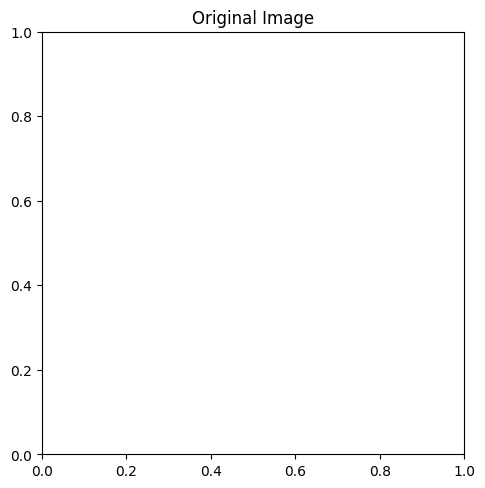

In [ ]:
# Calculate the histogram of the image
hist = cv2.calcHist([imagefp], [0], None, [256], [0, 256])

# Display the original image and histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imagefp, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.plot(hist, color='black')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid()

plt.show()


#### Basic Thresholding

In [ ]:
# Determine a threshold value using the histogram (e.g., midpoint between peaks)
T = 120

# Apply binary thresholding
_, binary_thresh = cv2.threshold(imagefp, T, 255, cv2.THRESH_BINARY)

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imagefp, cmap='gray')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 2, 2)
plt.title("Binary Thresholding")
plt.imshow(binary_thresh, cmap='gray')
plt.axis("off")
plt.show()


In [ ]:
hist = cv2.calcHist([binary_thresh], [0], None, [256], [0, 256])


plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.plot(hist, color='black')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid()

plt.show()

#### Otsu's Thresholding

In [ ]:
# Perform Otsu's Thresholding
_, otsu_thresh = cv2.threshold(imagefp, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original image and Otsu's segmentation result
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imagefp, cmap='gray')
plt.axis('off')

# Otsu's Thresholding Result
plt.subplot(1, 2, 2)
plt.title("Otsu's Segmentation")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Local Image Thresholding

In [ ]:
imagesd = cv2.imread("/content/sample_data/sudoku.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
# Calculate the histogram of the image
hist = cv2.calcHist([imagesd], [0], None, [256], [0, 256])

# Display the original image and histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imagesd, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Histogram")
plt.plot(hist, color='black')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid()

plt.show()

In [ ]:
# Apply local thresholding (Adaptive Thresholding in OpenCV)
local_thresh = cv2.adaptiveThreshold(
    imagesd,                       # Input image
    255,                           # Maximum value to use with binary thresholding
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # Adaptive method: Gaussian weighted sum
    cv2.THRESH_BINARY,          # Thresholding type
    11,                            # Block size: Size of local region
    2                              # Constant subtracted from mean or weighted mean
)

# Display the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imagesd, cmap='gray')
plt.axis('off')

# Local Thresholding Result
plt.subplot(1, 2, 2)
plt.title("Local Thresholding")
plt.imshow(local_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Multi Level Thresholding

In [ ]:
from skimage import data
from skimage.filters import threshold_multiotsu

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Region-based Segmentation

##Region Growing

In [ ]:
def region_growing(image, seed_point, threshold):

    # Initialize the segmented region
    segmented = np.zeros_like(image, dtype=np.uint8)

    # Create a stack for region growing
    stack = [seed_point]

    # Get the intensity of the seed point
    seed_intensity = image[seed_point]

    # Define connectivity (4-connectivity or 8-connectivity)
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # 4-connectivity

    while stack:
        # Pop the next pixel to process
        x, y = stack.pop()

        # Check if the pixel is within bounds and not already segmented
        if segmented[x, y] == 0:
            # Check if the intensity difference is within the threshold
            if abs(int(image[x, y]) - int(seed_intensity)) <= threshold:
                # Mark the pixel as part of the region
                segmented[x, y] = 255

                # Add neighbors to the stack
                for dx, dy in neighbors:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
                        stack.append((nx, ny))

    return segmented

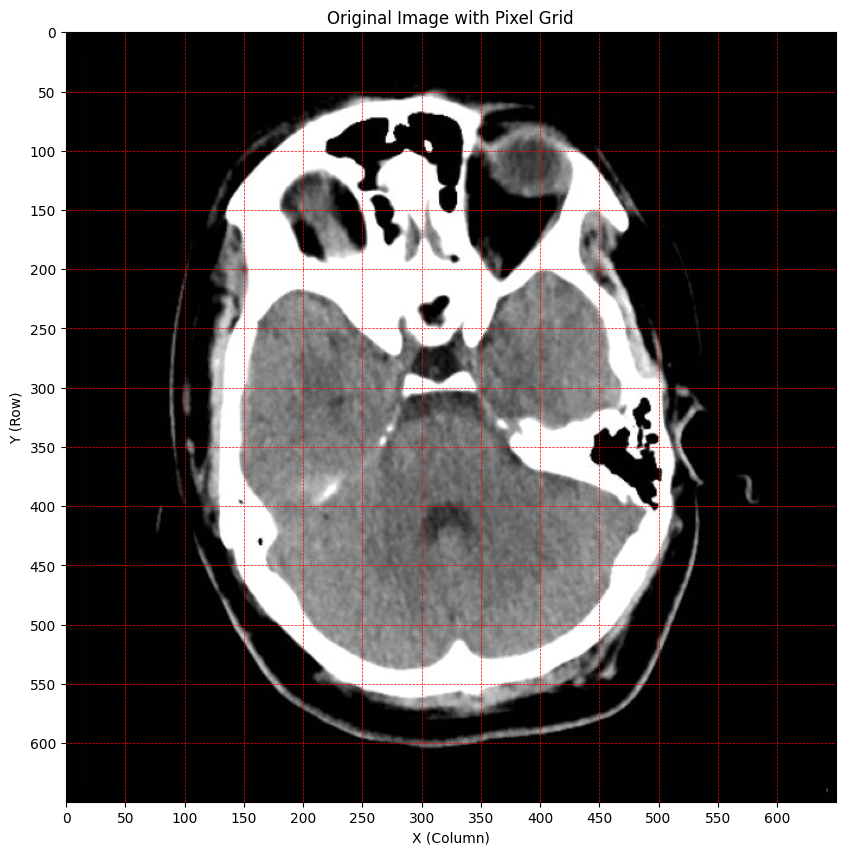

In [ ]:
# Load a grayscale image
imagebrain = cv2.imread('/content/sample_data/brain.jpg', cv2.IMREAD_GRAYSCALE)

# Overlay the pixel grid and display the image
plt.figure(figsize=(10, 10))
plt.imshow(imagebrain, cmap='gray')
plt.title("Original Image with Pixel Grid")

# Add gridlines for pixel visualization
plt.grid(color='red', linestyle='--', linewidth=0.5)
plt.xticks(ticks=np.arange(0, imagebrain.shape[1], 50))  # Adjust step as needed
plt.yticks(ticks=np.arange(0, imagebrain.shape[0], 50))

plt.xlabel("X (Column)")
plt.ylabel("Y (Row)")

plt.show()


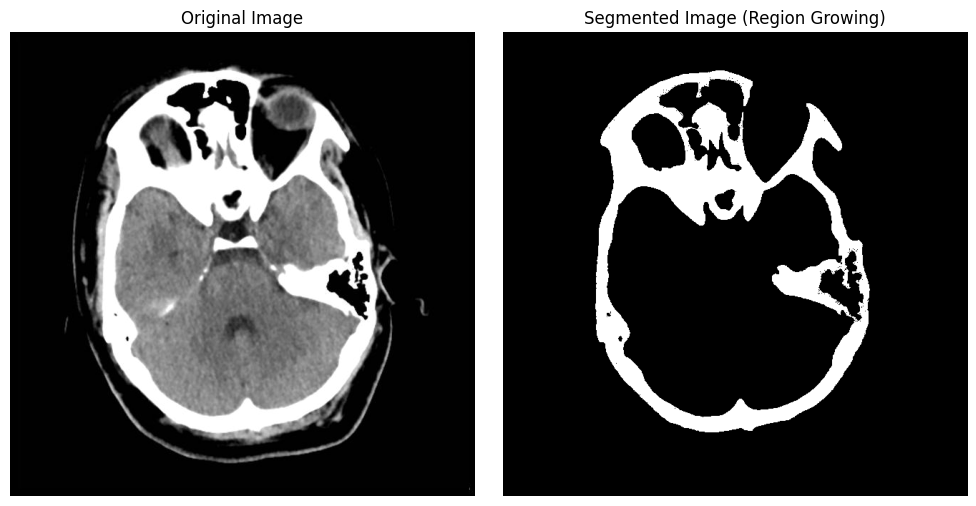

In [ ]:
# Define the seed point and threshold
seed_point = (225, 175)
threshold = 10

# Perform region growing
segmented_image = region_growing(imagebrain, seed_point, threshold)

# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(imagebrain, cmap='gray')
plt.axis('off')

# Segmented Image
plt.subplot(1, 2, 2)
plt.title("Segmented Image (Region Growing)")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

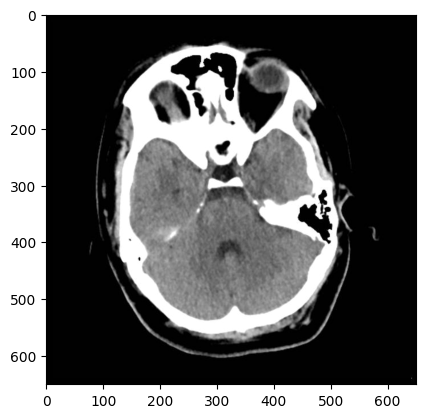

In [ ]:
def onclick(event):
    global seed_point
    seed_point = (int(event.ydata), int(event.xdata))
    print(f"Seed point selected at: {seed_point}")

fig, ax = plt.subplots()
ax.imshow(imagebrain, cmap='gray')
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

## Watersheed

In [ ]:
# Load the image
image = cv2.imread('/content/sample_data/coin.png')  # Replace with your image file
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Preprocess the image
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Apply thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


In [ ]:
# Step 2: Detect sure background and foreground
# Morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=2)

# Distance transform to find sure foreground
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 3: Compute markers
sure_fg = np.uint8(sure_fg)  # Convert foreground to uint8
unknown = cv2.subtract(sure_bg, sure_fg)  # Identify unknown region

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Step 4: Apply watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

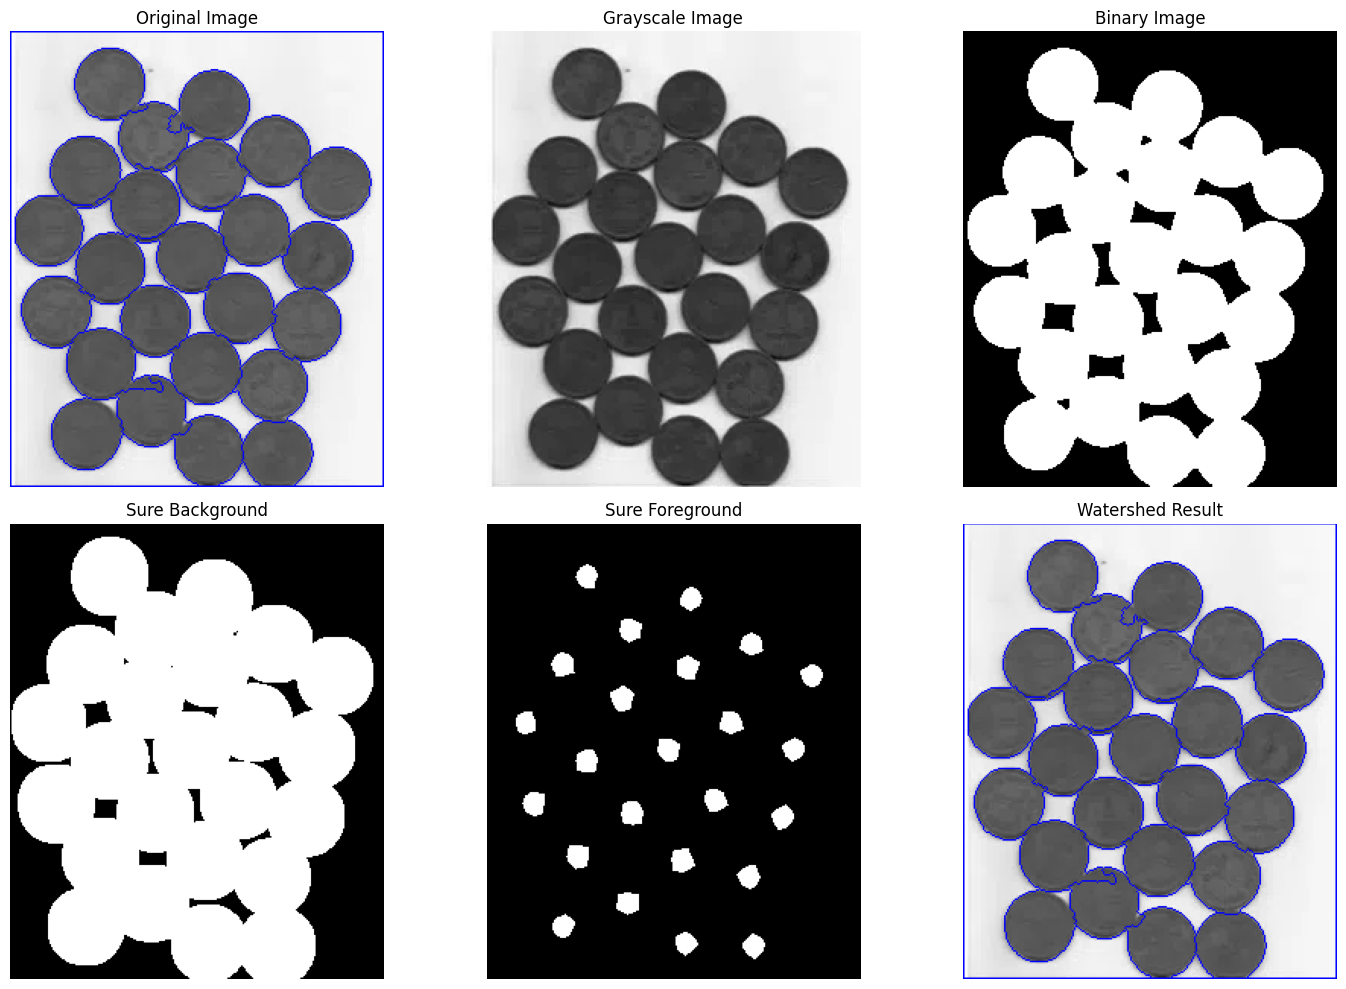

In [ ]:
# Display results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Grayscale Image
plt.subplot(2, 3, 2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Binary Image
plt.subplot(2, 3, 3)
plt.title("Binary Image")
plt.imshow(binary, cmap='gray')
plt.axis('off')

# Sure Background
plt.subplot(2, 3, 4)
plt.title("Sure Background")
plt.imshow(sure_bg, cmap='gray')
plt.axis('off')

# Sure Foreground
plt.subplot(2, 3, 5)
plt.title("Sure Foreground")
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')

# Watershed Result
plt.subplot(2, 3, 6)
plt.title("Watershed Result")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

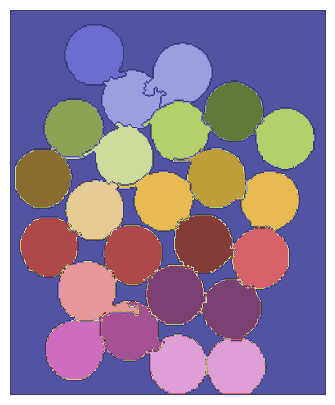

In [ ]:
# watershed Algorithm
markers = cv2.watershed(image, markers)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()


labels = np.unique(markers)

coins = []
for label in labels[2:]:
# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
    target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])


## Clustering

In [ ]:
# Load the image
image = cv2.imread('/content/sample_data/beach.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Reshape the image to a 2D array of pixels
pixel_values = image_rgb.reshape((-1, 3))  # Flatten the image to Nx3 array
pixel_values = np.float32(pixel_values)    # Convert to float for k-means

# Define the number of clusters (segments)
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  # K-Means stopping criteria

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(
    pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
)

# Convert cluster centers back to uint8
centers = np.uint8(centers)

# Map each pixel to its corresponding cluster center
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

<ipython-input-98-3bc83fa63d0f>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab10', k)  # 'tab10' is a discrete colormap with 10 distinct colors


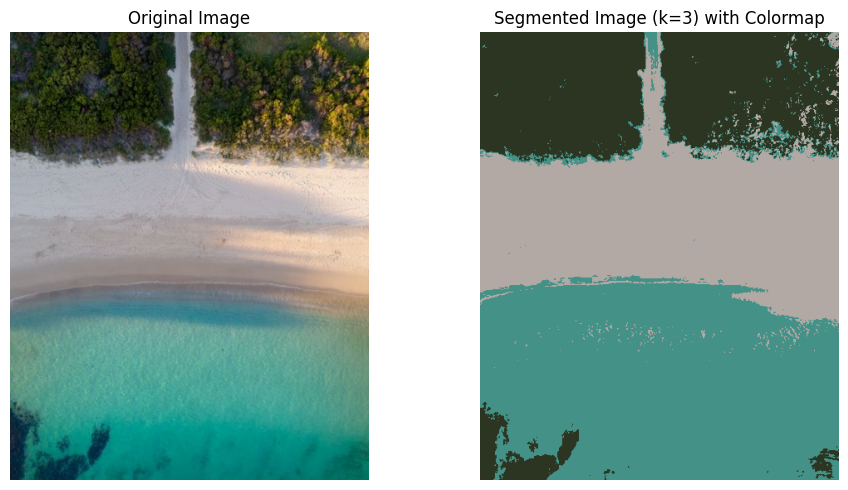

In [ ]:
# Create a colormap for visualization
from matplotlib import cm
colormap = cm.get_cmap('tab10', k)  # 'tab10' is a discrete colormap with 10 distinct colors
colors = (colormap(np.arange(k))[:, :3] * 255).astype(np.uint8)  # Scale to 0-255 for RGB

# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

# Segmented Image with Colormap
plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (k={k}) with Colormap")
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()